In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

<Figure size 640x480 with 1 Axes>

#### 降维demean

In [2]:
def demean(X):
    return X - np.mean(X, axis=0)

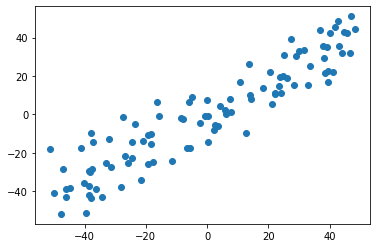

In [3]:
X_demean = demean(X)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [4]:
np.mean(X_demean[:, 0]) #基本为0

-1.1723955140041652e-14

#### 梯度上升法

In [5]:
def f(w, X):
    return np.sum((X.dot(w)) **2) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

def direction(w): #将w的模变成1
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w +  eta * gradient
        w = direction(w) #每次求一个单位方向向量
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [6]:
initial_w = np.random.random(X.shape[1]) #不能从0开始
initial_w

array([0.68359305, 0.59429515])

In [7]:
eta = 0.001

In [11]:
# 不能使用StandardScaler标准化数据

In [12]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7542434 , 0.65659493])

In [15]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

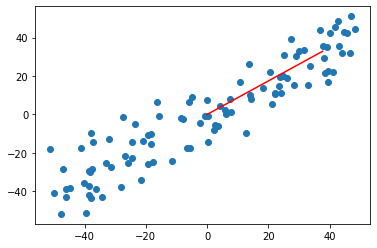

In [16]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 50], [0, w[1] * 50], color = 'r')
plt.show()